In [58]:
#description This program used the Money Flow Index to determine
#when to buy and sell the stock

#import library
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


In [59]:
#laoding the data
#making index date
nifty=pd.read_csv('nifty.csv',index_col='Date',parse_dates=True)

nifty

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0
...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0


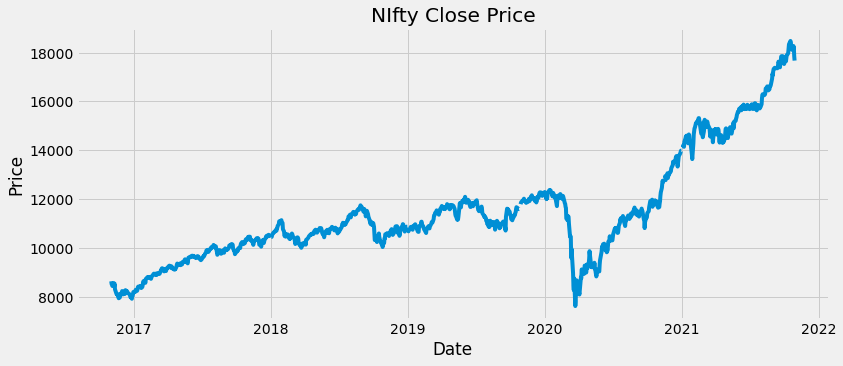

In [60]:
#visually show the data
plt.figure(figsize=(12,5))
plt.plot(nifty['Close'],label='Close Price')
plt.title('NIfty Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [61]:
#Money Flow Index Calculation 
typical_price=(nifty['Close']+nifty['High']+nifty['Low'])/3
typical_price


Date
2016-11-01     8636.783203
2016-11-02     8522.783203
2016-11-03     8499.583659
2016-11-04     8446.000000
2016-11-07     8504.783203
                  ...     
2021-10-25    18111.766927
2021-10-26    18226.050130
2021-10-27    18240.300130
2021-10-28    17949.132813
2021-10-29    17733.533203
Length: 1236, dtype: float64

In [62]:
#get the period
period=14

In [63]:
#Calculate the money flow
money_flow=typical_price*nifty['Volume']
money_flow

Date
2016-11-01    1.425069e+09
2016-11-02    1.323588e+09
2016-11-03    1.449179e+09
2016-11-04    1.898661e+09
2016-11-07    1.469627e+09
                  ...     
2021-10-25    7.583397e+09
2021-10-26    6.222374e+09
2021-10-27    6.114149e+09
2021-10-28    6.716565e+09
2021-10-29    5.967334e+09
Length: 1236, dtype: float64

In [64]:
#Get all the positibve negative money flows
positive_flow=[]
negative_flow=[]
#Looping through the typical Price
for i in range(1,len(typical_price)):
    if typical_price[i]>typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i]<typical_price[i-1]:
        positive_flow.append(0)
        negative_flow.append(money_flow[i-1])
    else:
        positive_flow.append(0)
        negative_flow.append(0)
    

In [65]:
#positive_flow
negative_flow

[1425069228.4950001,
 1323588231.4259002,
 1449179013.8595,
 0,
 0,
 1668867615.612833,
 0,
 2248180764.2029996,
 2227889886.8806996,
 2932293303.348,
 2192925974.1491666,
 1548987983.3333335,
 1303105878.5992,
 0,
 0,
 1451716539.246,
 0,
 0,
 0,
 0,
 0,
 1294651291.7192333,
 0,
 0,
 939798777.4944999,
 0,
 0,
 1236454654.4609997,
 0,
 1509195552.0986664,
 1184609022.9688003,
 1484787911.4503999,
 1654152306.2516668,
 871074867.0168,
 1035488000.0,
 998964073.9189999,
 980411786.6096001,
 990748209.3207667,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1151625192.7705333,
 0,
 0,
 0,
 0,
 1558654026.2888331,
 0,
 0,
 0,
 1398221779.2165,
 0,
 0,
 0,
 0,
 2379534083.7947993,
 2631907150.2874336,
 0,
 0,
 0,
 0,
 1709770654.6632,
 1985303454.2048333,
 0,
 0,
 1986929775.5577,
 1802174071.7052996,
 1656114191.6666667,
 0,
 0,
 0,
 0,
 0,
 0,
 3375839437.977066,
 1692461619.7503002,
 0,
 1839730173.0640333,
 1952574832.4446669,
 0,
 0,
 1552366378.7290003,
 1586764235.1096668,
 0,
 0,
 2457049525.

In [66]:
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(positive_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

In [67]:
positive_mf



[7724676003.796566,
 9403438269.604033,
 9403438269.604033,
 11482480077.847866,
 11019667956.284367,
 11089134422.609098,
 12636340250.685165,
 12059990085.255665,
 12059990085.255665,
 13450063293.479832,
 14475872876.813166,
 14475872876.813166,
 15855214876.813166,
 17026320233.240665,
 15279716399.018665,
 14485785077.300232,
 14485785077.300232,
 12406743269.0564,
 10970894590.6199,
 9431801586.816767,
 7884595758.7407,
 5851161092.074033,
 5851161092.074033,
 4461087883.849867,
 3435278300.516533,
 4282357449.952866,
 3852670977.6748667,
 3702083433.0118666,
 5144095683.071366,
 5301227190.6883335,
 6268341512.998834,
 7310502045.565867,
 8395736294.574134,
 9709910270.310167,
 9709910270.310167,
 10526718890.535334,
 11710092815.955534,
 13269972623.596033,
 14720198108.148367,
 13873118958.712034,
 13966478443.831066,
 13971460106.7039,
 13909446487.346,
 12867484035.64,
 13596398483.165165,
 14187223238.688133,
 14616521706.36893,
 15809004461.5229,
 15809004461.5229,
 149921

In [68]:
#Calculate the money flow index
mfi=100*(np.array(positive_mf)/(np.array(positive_mf)+np.array(negative_mf)))
mfi
        

array([29.65922839, 35.75661605, 35.58325144, ..., 65.54291194,
       59.13361966, 52.06858456])

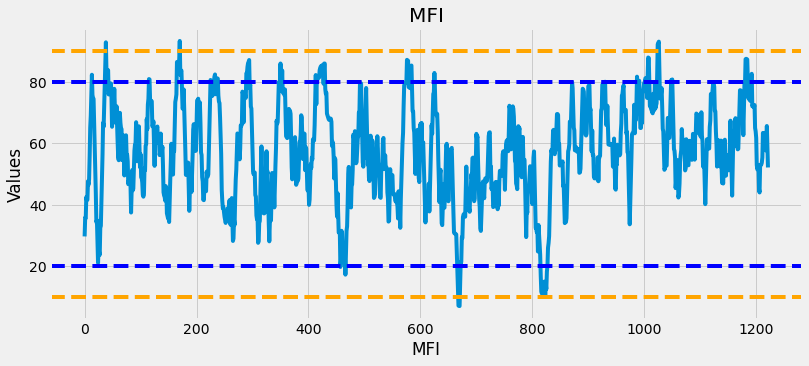

In [69]:
#Visually show the MFI
df2=pd.DataFrame()
df2['MFI']=mfi
plt.figure(figsize=(12,5))
plt.plot(df2['MFI'],label='MFI')
plt.title('MFI')
plt.xlabel('MFI')
plt.ylabel('Values')
plt.axhline(10,linestyle='--',color='orange')
plt.axhline(20,linestyle='--',color='blue')
plt.axhline(80,linestyle='--',color='blue')
plt.axhline(90,linestyle='--',color='orange')
plt.show()



In [70]:
#Create the new dataframe
new_df=pd.DataFrame()
new_df=nifty[period:]
new_df['MFI']=mfi
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2016-11-22,7989.149902,8019.049805,7938.149902,8002.299805,8002.299805,210200.0,29.659228
2016-11-23,8051.200195,8055.200195,7973.100098,8033.299805,8033.299805,181000.0,35.756616
2016-11-24,8011.799805,8024.850098,7952.549805,7965.500000,7965.500000,260500.0,35.583251
2016-11-25,8007.950195,8122.250000,7976.750000,8114.299805,8114.299805,177900.0,42.438978
2016-11-28,8080.649902,8146.500000,8066.500000,8126.899902,8126.899902,189700.0,41.437237
...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,57.625146
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,58.599042
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,65.542912


In [71]:
#Create a functin to get the buy and sell signals
def get_signal(data,high,low):
    buy_signal=[]
    sell_signal=[]
    for i in range(len(data['MFI'])):
        if data['MFI'][i]>high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i]<low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)

    return(buy_signal,sell_signal)


In [72]:
new_df['Buy']=get_signal(new_df,80,20)[0]
new_df['Sell']=get_signal(new_df,80,20)[1]
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
Date,,,,,,,,,
2016-11-22,7989.149902,8019.049805,7938.149902,8002.299805,8002.299805,210200.0,29.659228,NaN,NaN
2016-11-23,8051.200195,8055.200195,7973.100098,8033.299805,8033.299805,181000.0,35.756616,NaN,NaN
2016-11-24,8011.799805,8024.850098,7952.549805,7965.500000,7965.500000,260500.0,35.583251,NaN,NaN
2016-11-25,8007.950195,8122.250000,7976.750000,8114.299805,8114.299805,177900.0,42.438978,NaN,NaN
2016-11-28,8080.649902,8146.500000,8066.500000,8126.899902,8126.899902,189700.0,41.437237,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,57.625146,NaN,NaN
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,58.599042,NaN,NaN
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,65.542912,NaN,NaN


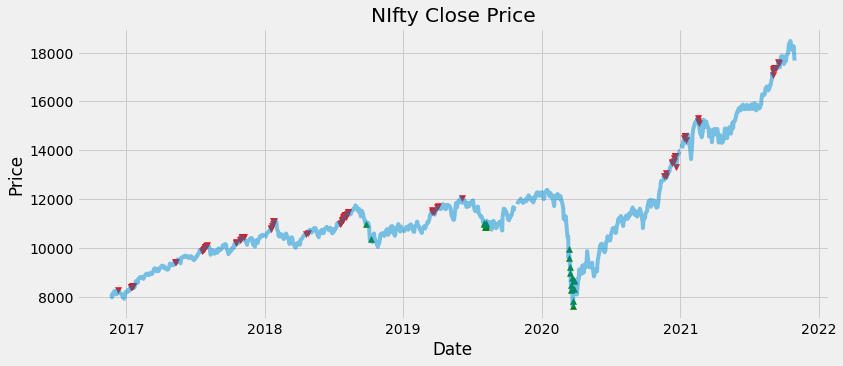

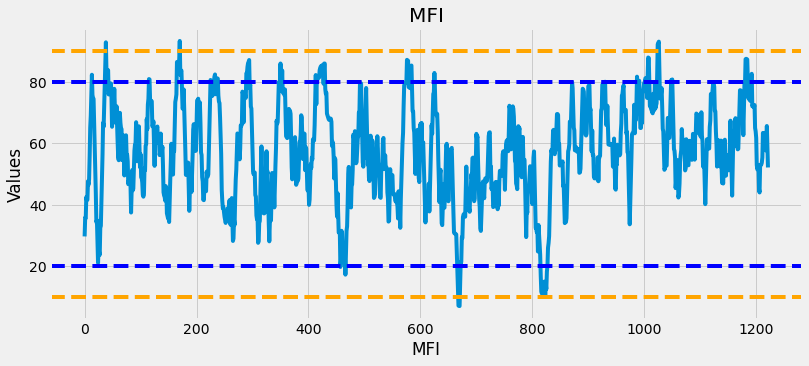

In [74]:
#visually show the data
plt.figure(figsize=(12,5))
plt.plot(new_df['Close'],label='Close Price',alpha=0.5)
plt.title('NIfty Close Price')
plt.scatter(new_df.index,new_df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(new_df.index,new_df['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

df2=pd.DataFrame()
df2['MFI']=mfi
plt.figure(figsize=(12,5))
plt.plot(df2['MFI'],label='MFI')
plt.title('MFI')
plt.xlabel('MFI')
plt.ylabel('Values')
plt.axhline(10,linestyle='--',color='orange')
plt.axhline(20,linestyle='--',color='blue')
plt.axhline(80,linestyle='--',color='blue')
plt.axhline(90,linestyle='--',color='orange')
plt.show()





